# Setup

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.utils import resample
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Pre-processing

In [2]:
df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

In [3]:
with open('../dataset/processed/data.csv', 'w') as f:
    f.write('title_content|label\n')
    for _class in df:
        df[_class]['title_content'] = df[_class][['title', 'content']].apply(lambda x: '{} {}'.format(x[0],x[1]), axis=1)
        df[_class]['label'] = _class
        df[_class].to_csv(f, sep='|', columns=['title_content', 'label'], header=False, index=False)

20

# Data Analysis

Text(0,0.5,'Observations')

Text(0.5,0,'Classes')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

Text(0.5,1,'Classes Histogram - original dataset')

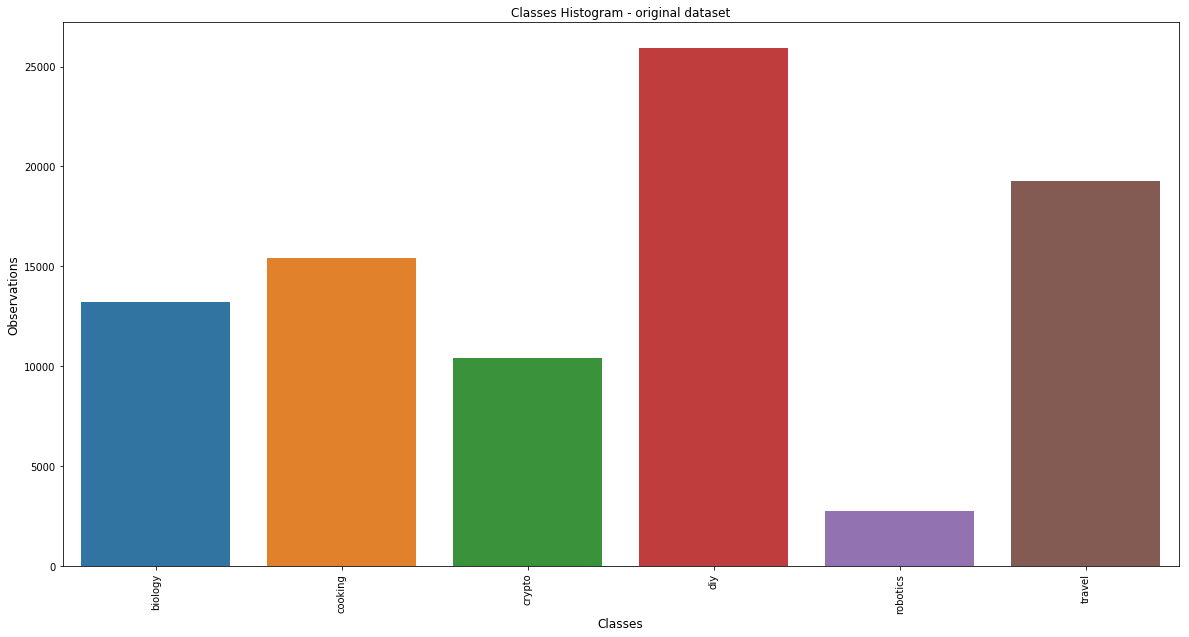

In [4]:
dataset = pd.read_csv('../dataset/processed/data.csv', sep='|')
labels = dataset['label'].value_counts()
fig = plt.figure(figsize=(20, 10))
ax1 = sns.countplot(dataset['label'].sort_values())
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Classes Histogram - original dataset')
# print(dataset.shape)
# print(labels)
plt.show()

# Sampling

Text(0,0.5,'Observations')

Text(0.5,0,'Classes')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

Text(0.5,1,'Classes Histogram - after sampling')

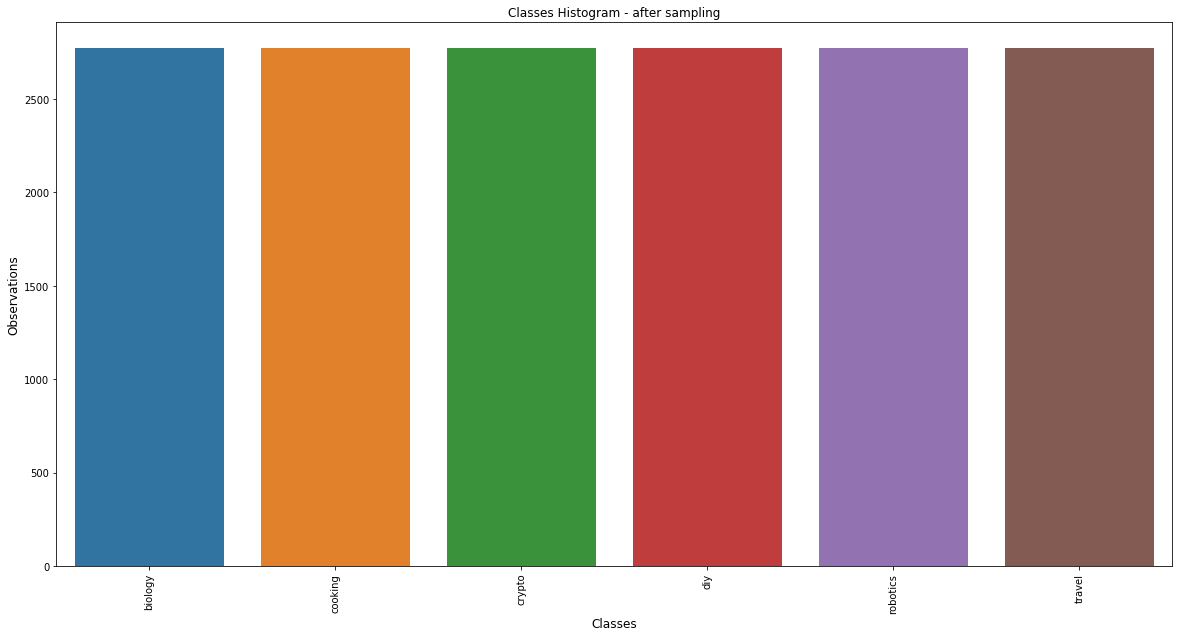

In [5]:
ds = {}
for label in labels.keys():
    ds[label] = dataset[dataset.label == label]
    ds[label] = resample(ds[label], replace=False, n_samples=labels.min(), random_state=711)
ds = pd.concat(ds[label] for label in ds)

fig = plt.figure(figsize=(20, 10))
ax1 = sns.countplot(ds['label'].sort_values())
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Classes Histogram - after sampling')
plt.show()

# Bag-of-Words

In [8]:
tfidf = TfidfVectorizer(analyzer='word',
                        stop_words=STOP_WORDS,
                        ngram_range=(1,1),
                        max_df=0.95, min_df=1,
                        sublinear_tf=True)
X = tfidf.fit_transform(ds['title_content'])
print(X.shape)

l_enc = LabelEncoder()
y = l_enc.fit_transform(ds['label'])
print('Encoded labels: ', list([(i, l_enc.classes_[i]) for i in range(0, len(l_enc.classes_))]))

(16626, 34015)
Encoded labels:  [(0, 'biology'), (1, 'cooking'), (2, 'crypto'), (3, 'diy'), (4, 'robotics'), (5, 'travel')]


# Dimensionality reduction

In [7]:
svd = TruncatedSVD(n_components=1000, algorithm='randomized')
X_svd = svd.fit_transform(X)
print('Shape of svd matrix: ', X_svd.shape)

Shape of svd matrix:  (16626, 1000)


# Split Valid/Train/Test examples

In [11]:
# X = np.concatenate([svd_titulo, svd_resumo], axis=1)
X_temp, X_valid, y_temp, y_valid = train_test_split(X_svd, y, test_size=0.1, random_state=283)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=283)

print('X_train matrix shape is: {0}'.format(X_train.shape))
print('X_test matrix shape is: {0}'.format(X_test.shape))
print('X_valid matrix shape is: {0}'.format(X_valid.shape))
print('y_train matrix shape is: {0}'.format(y_train.shape))
print('y_test matrix shape: {0}'.format(y_test.shape))
print('y_valid matrix shape: {0}'.format(y_valid.shape))

X_train matrix shape is: (11970, 1000)
X_test matrix shape is: (2993, 1000)
X_valid matrix shape is: (1663, 1000)
y_train matrix shape is: (11970,)
y_test matrix shape: (2993,)
y_valid matrix shape: (1663,)
